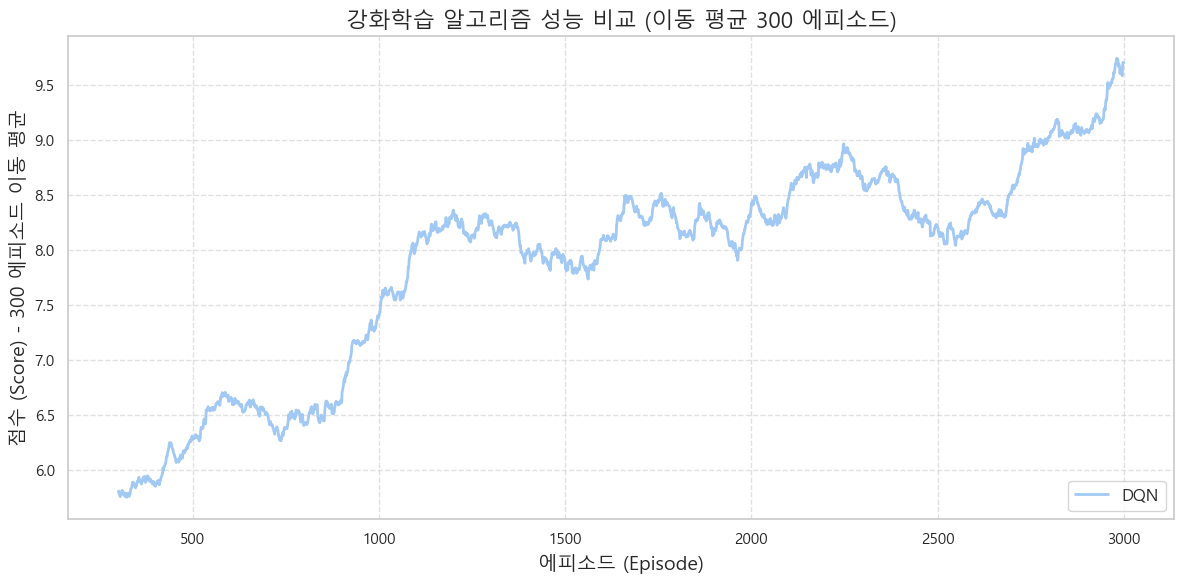

✅ DQN: 데이터 로드 및 이동 평균 적용 완료. (총 3000 에피소드)


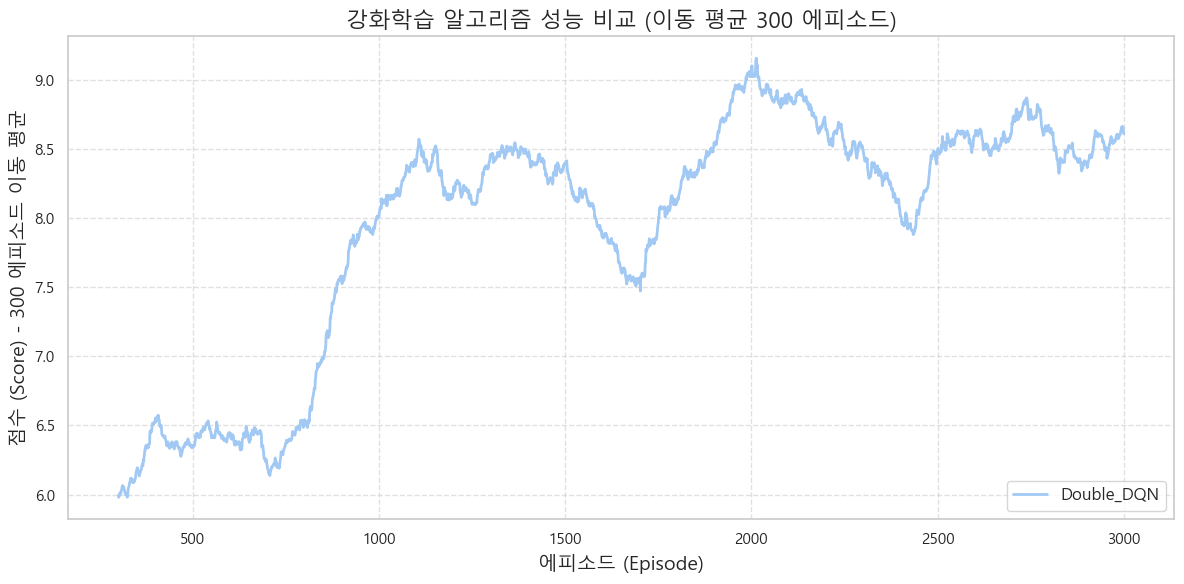

✅ Double_DQN: 데이터 로드 및 이동 평균 적용 완료. (총 3000 에피소드)


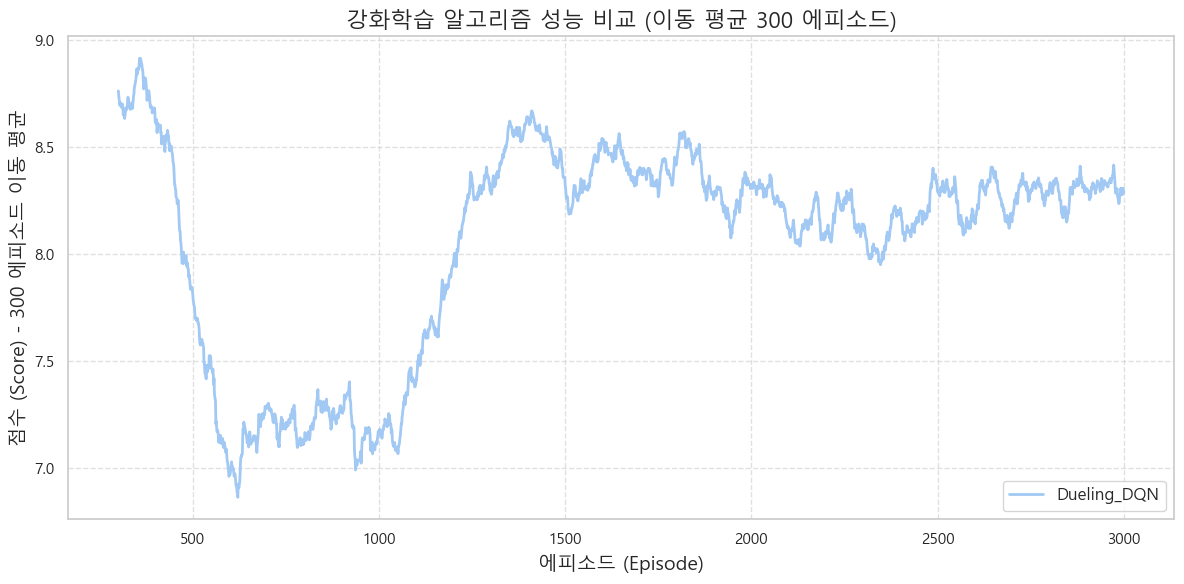

✅ Dueling_DQN: 데이터 로드 및 이동 평균 적용 완료. (총 3000 에피소드)


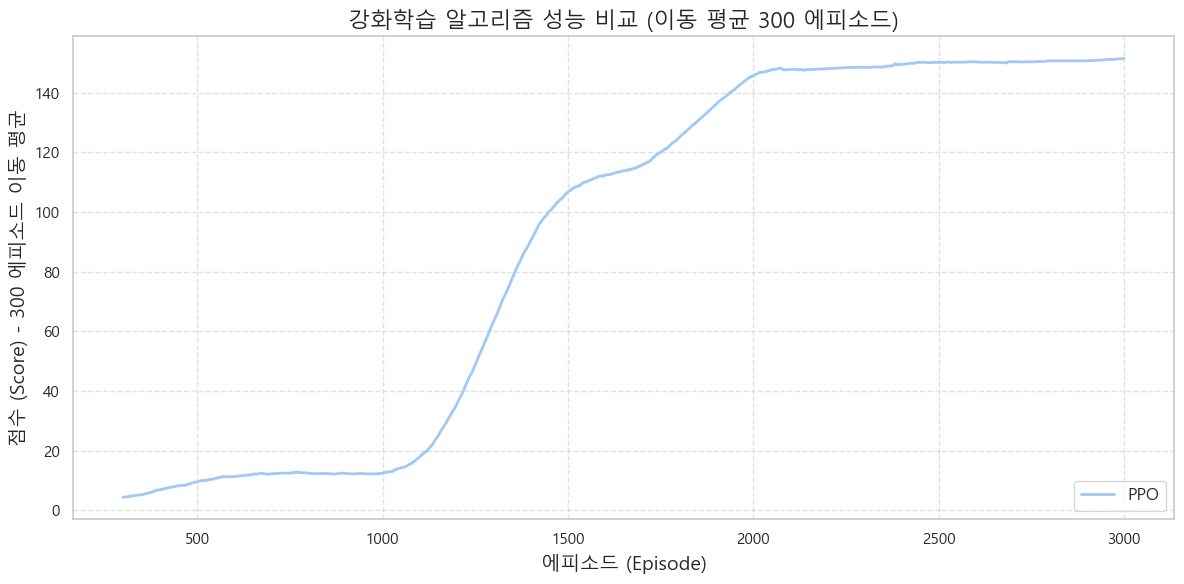

✅ PPO: 데이터 로드 및 이동 평균 적용 완료. (총 3000 에피소드)


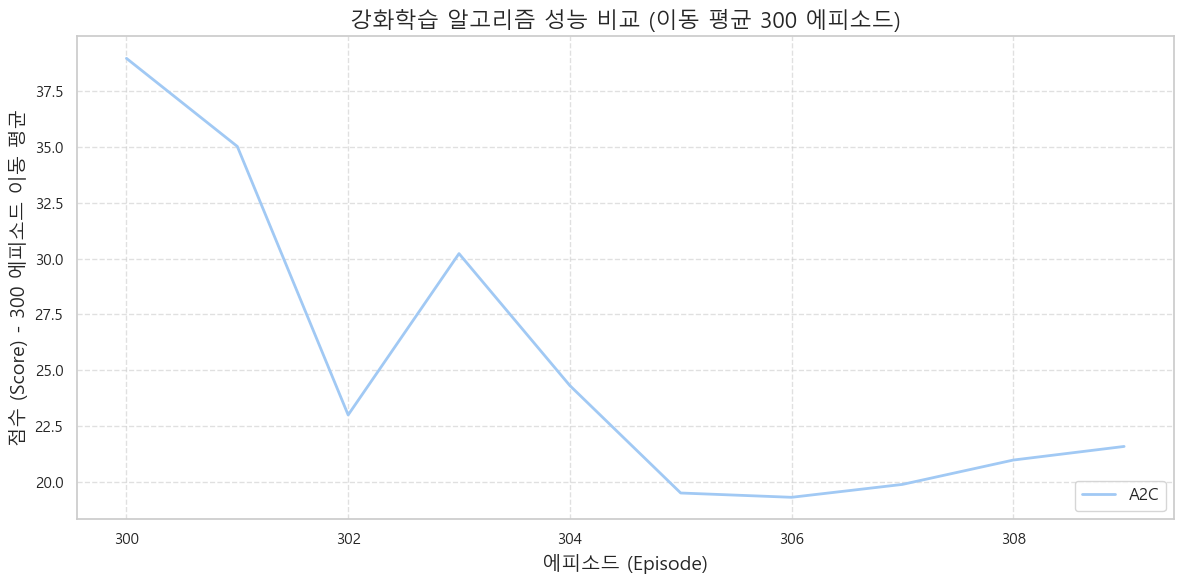

✅ A2C: 데이터 로드 및 이동 평균 적용 완료. (총 10 에피소드)


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# --- 설정 변수 ---
ALGORITHMS = ["DQN", "Double_DQN", "Dueling_DQN", "PPO", "A2C"]
WINDOW_SIZE = 100  # 이동 평균을 계산할 윈도우 크기 (객관성 있는 추세 파악을 위해 중요)
FIG_SIZE = (12, 6)
loaded_scores = []

def load_and_plot_scores(algorithms, window_size, fig_size):
    """
    각 알고리즘의 scores.npy 파일을 불러와 학습 곡선 그래프를 생성합니다.
    """
    # 5가지 알고리즘의 학습 곡선을 그립니다.
    for algo in algorithms:
        file_name = f"./scores/{algo}_scores.npy"
        
        try:
            plt.figure(figsize=fig_size)
            plt.title(f"강화학습 알고리즘 성능 비교 (이동 평균 {window_size} 에피소드)", fontsize=16)
            plt.xlabel("에피소드 (Episode)", fontsize=14)
            plt.ylabel(f"점수 (Score) - {window_size} 에피소드 이동 평균", fontsize=14)
            plt.grid(True, linestyle='--', alpha=0.6)
            
            # 1. 점수 데이터 불러오기
            scores = np.load(file_name)
            loaded_scores.append(scores)
            scores = np.mean(scores, axis = 0)
            

            # 2. 이동 평균 계산 함수 정의 및 적용
            def moving_average(data, window):
                """데이터에 이동 평균을 적용하여 평활화합니다."""
                if len(data) < window:
                    # 데이터가 윈도우 크기보다 작으면 원본 반환
                    return data
                
                # convolution을 이용한 효율적인 이동 평균 계산
                weights = np.ones(window) / window
                smoothed_data = np.convolve(data, weights, 'valid')
                
                # 시작점 맞추기: valid 모드는 윈도우 크기만큼 길이가 줄어들므로, 
                # 시작 부분을 채우거나 (간단히) 뒤쪽부터 플롯합니다.
                return smoothed_data
            
            smoothed_scores = moving_average(scores, window_size)
            
            # 3. 그래프에 추가
            # 이동 평균이 적용된 후의 길이에 맞춰 X축 생성
            x_axis = np.arange(len(smoothed_scores)) + window_size
            
            plt.plot(x_axis, smoothed_scores, label=f"{algo}", linewidth=2)
            plt.legend(loc="lower right", fontsize=12)
            plt.tight_layout()
            plt.show()
            
            print(f"✅ {algo}: 데이터 로드 및 이동 평균 적용 완료. (총 {len(scores)} 에피소드)")

        except FileNotFoundError:
            print(f"❌ 오류: {file_name} 파일을 찾을 수 없습니다. 이 알고리즘은 건너뜁니다.")
        except Exception as e:
            print(f"❌ 오류 발생 중 {algo}: {e}")

#    # 4. 그래프 설정 마무리
#    plt.legend(loc="lower right", fontsize=12)
#    plt.tight_layout()


# --- 함수 실행 ---
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
load_and_plot_scores(ALGORITHMS, 300, FIG_SIZE)

In [2]:
loaded_scores

[array([[15.94,  0.  ,  0.  , ..., 14.98,  0.  , 15.14],
        [ 0.17, 17.38,  0.  , ..., 15.14,  0.  , 15.3 ],
        [ 0.87, 16.42,  0.  , ..., 15.3 , 15.14, 15.14],
        [16.58,  4.25,  5.05, ...,  0.  ,  0.  , 17.38],
        [ 0.65, 17.06, 16.58, ..., 15.3 , 15.3 ,  0.  ]], shape=(5, 3000)),
 array([[15.94,  4.41,  5.06, ..., 14.98, 15.3 , 15.14],
        [ 0.17, 17.38,  0.  , ..., 15.14, 15.3 , 15.3 ],
        [ 0.87, 16.42,  1.38, ...,  0.  ,  0.  ,  3.29],
        [16.58,  1.44,  0.65, ...,  0.  ,  0.  , 15.3 ],
        [ 0.65, 17.06,  0.  , ..., 15.3 ,  0.  , 15.46]], shape=(5, 3000)),
 array([[ 41.6 ,   5.45,   8.39, ..., 188.56, 184.28, 185.56],
        [ 10.64,  10.86,   2.65, ..., 188.36, 184.82, 188.06],
        [  0.  ,   4.58,   0.  , ...,   9.33,  82.76,  48.36],
        [ 24.7 ,   5.06,  16.12, ..., 175.84, 189.16, 187.58],
        [  8.43,   2.25,   2.39, ..., 186.9 , 188.4 , 186.76]],
       shape=(5, 3000))]

In [7]:
from modelloader import load_scores

def plot_final_evaluation_npy(algorithms, path):
    final_scores = []
    
    for alg in algorithms:
        try:
            raw_scores = load_scores(path, alg)
            print(raw_scores)
            # 최종 성능은 일반적으로 학습된 마지막 N개 에피소드 또는
            # 전체 에피소드의 평균으로 정의할 수 있음. 
            # 여기서는 '전체 학습 점수'를 평가 샘플로 가정
            final_scores.extend([(alg, score) for score in raw_scores])
            
        except FileNotFoundError:
            continue

    if not final_scores:
        print("❌ 평가할 데이터를 찾지 못했습니다.")
        return

    # Pandas DataFrame 없이 Numpy만으로 통계 계산 (혹은 간단한 dictionary 사용)
    # Seaborn 사용을 위해 임시로 Pandas DataFrame 생성
    import pandas as pd
    df_scores = pd.DataFrame(final_scores, columns=['Algorithm', 'Score'])
    
    # 알고리즘별 통계 계산 (evaluate.py의 summarize_by_algorithm 역할)
    summary_df = df_scores.groupby("Algorithm")["Score"].agg(["mean", "std", "count"])
    summary_df = summary_df.rename(columns={"mean": "mean_score", "std": "std_score", "count": "n"})
    summary_df["sem"] = summary_df["std_score"] / np.sqrt(summary_df["n"])
    summary_df.reset_index(inplace=True)
    
    # 바 차트 시각화 (evaluate.py의 plot_bar_ci 역할)
    plt.figure(figsize=(8, 5))
    ax = plt.gca()
    sns.barplot(data=summary_df, x="Algorithm", y="mean_score", yerr=0, ax=ax,
                palette="pastel", capsize=0.1)
    
    # 95% CI를 error bar로 추가
    ci_95 = 1.96 * summary_df["sem"]
    ax.errorbar(summary_df["Algorithm"],
                summary_df["mean_score"],
                yerr=ci_95,
                fmt='none', c='black', capsize=5)
    
    plt.title("Mean Score by Algorithm with 95% CI (from .npy)", fontsize=14)
    plt.ylabel("Mean Score", fontsize=12)
    plt.xlabel("Algorithm", fontsize=12)
    plt.tight_layout()
    plt.show()

plot_final_evaluation_npy(ALGORITHMS, "./scores")

[[15.94  0.    0.   ... 14.98  0.   15.14]
 [ 0.17 17.38  0.   ... 15.14  0.   15.3 ]
 [ 0.87 16.42  0.   ... 15.3  15.14 15.14]
 [16.58  4.25  5.05 ...  0.    0.   17.38]
 [ 0.65 17.06 16.58 ... 15.3  15.3   0.  ]]
[[15.94  4.41  5.06 ... 14.98 15.3  15.14]
 [ 0.17 17.38  0.   ... 15.14 15.3  15.3 ]
 [ 0.87 16.42  1.38 ...  0.    0.    3.29]
 [16.58  1.44  0.65 ...  0.    0.   15.3 ]
 [ 0.65 17.06  0.   ... 15.3   0.   15.46]]
[[ 41.6    5.45   8.39 ... 188.56 184.28 185.56]
 [ 10.64  10.86   2.65 ... 188.36 184.82 188.06]
 [  0.     4.58   0.   ...   9.33  82.76  48.36]
 [ 24.7    5.06  16.12 ... 175.84 189.16 187.58]
 [  8.43   2.25   2.39 ... 186.9  188.4  186.76]]


ValueError: setting an array element with a sequence.

In [2]:
# evaluate.py
import os
import glob
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="pastel")

# 사용자가 정의한 알고리즘 목록
ALGORITHMS = ["DQN", "Double_DQN", "Dueling_DQN", "PPO", "A2C"]
WINDOW_SIZE = 100 # 이동 평균 윈도우 크기 (선택 사항)

def load_results(algorithms):
    """
    {알고리즘명}_scores.npy 파일을 불러와 DataFrame으로 변환합니다.
    데이터 형태: (Seed_count, Episode_count)
    """
    dfs = []
    
    for alg in algorithms:
        file_name = f"./scores/{alg}_scores.npy"
        
        try:
            # 1. NumPy 데이터 불러오기: shape (5, 3000)
            data = np.load(file_name)
            
            # 2. DataFrame 변환을 위한 준비
            seed_count, episode_count = data.shape
            
            # 3. 데이터프레임으로 변환 (롱 폼)
            df = pd.DataFrame(data.T, columns=[f"Seed_{i}" for i in range(seed_count)])
            df.index.name = "Episode"
            df = df.reset_index()
            
            # 4. Episode, Seed, Score 컬럼으로 melt
            df_long = df.melt(id_vars=["Episode"], 
                              var_name="Seed", 
                              value_name="Score")
            
            # 5. 알고리즘 컬럼 추가
            df_long["Algorithm"] = alg
            
            dfs.append(df_long)
            print(f"✅ {alg}: {seed_count} seeds, {episode_count} episodes 데이터 로드 완료.")
            
        except FileNotFoundError:
            print(f"❌ 오류: {file_name} 파일을 찾을 수 없습니다. 이 알고리즘은 건너뜁니다.")
        except Exception as e:
            print(f"❌ 오류 발생 중 {alg}: {e}")

    if not dfs:
        raise FileNotFoundError("모든 알고리즘 파일 로드 실패.")
        
    results = pd.concat(dfs, ignore_index=True)
    return results

def summarize_by_algorithm(df):
    """
    각 알고리즘의 최종 에피소드(3000번째)의 Score만 추출하여 요약 통계 계산
    """
    # 최종 에피소드만 필터링 (Episode 0부터 시작한다고 가정할 경우)
    final_episode = df["Episode"].max()
    final_scores = df[df["Episode"] == final_episode]
    
    # 이 시점에서는 Seed별 최종 점수만 남음
    group = final_scores.groupby("Algorithm")["Score"].agg(["mean", "std", "count"])
    group = group.rename(columns={"mean": "mean_score", "std": "std_score", "count": "n"})
    
    # 통계 계산
    group["sem"] = group["std_score"] / np.sqrt(group["n"])
    group["ci_low"] = group["mean_score"] - 1.96 * group["sem"]
    group["ci_high"] = group["mean_score"] + 1.96 * group["sem"]
    
    return group.reset_index()

def plot_bar_ci(summary_df, out_dir="plots"):
    """
    알고리즘별 최종 평균 보상 + 95% CI를 바 차트로 그려 PNG/SVG로 저장
    """
    os.makedirs(out_dir, exist_ok=True)
    plt.figure(figsize=(8, 5))
    ax = plt.gca()
    
    # ⚠️ 수정된 부분: hue='Algorithm' 추가 및 legend=False로 설정
    sns.barplot(data=summary_df, 
                x="Algorithm", 
                y="mean_score", 
                hue="Algorithm", # X축과 동일한 변수를 hue에 할당
                yerr=0, 
                ax=ax,
                palette="pastel", 
                legend=False, # 경고 해결을 위해 범례 숨김
                capsize=0.1)
    
    # 95% CI를 error bar로 추가 (이 부분은 동일)
    ax.errorbar(summary_df["Algorithm"],
                summary_df["mean_score"],
                yerr=1.96 * summary_df["sem"],
                fmt='none', c='black', capsize=5)
                
    plt.title(f"Algorithm Final Performance Comparison (Episode {summary_df['n'].iloc[0]})")
    plt.ylabel("Mean Score (Final Episode)")
    plt.xlabel("Algorithm")
    plt.tight_layout()
    plt.savefig(os.path.join(out_dir, "algo_final_mean_ci.png"), dpi=300)
    plt.savefig(os.path.join(out_dir, "algo_final_mean_ci.svg"), format="svg")
    plt.close()

DOWNSAMPLE_RATE = 10 # 10 에피소드마다 하나의 데이터 포인트만 시각화

def plot_learning_curves_robust(df, out_dir="plots"):
    """
    Episode-wise Score를 다운샘플링 및 선처리 후 시각화하여 멈춤 문제를 해결합니다.
    df에 columns: Episode, Score, Algorithm, Seed
    """
    if "Episode" not in df.columns:
        return
        
    os.makedirs(out_dir, exist_ok=True)

    # 1. 데이터 다운샘플링 (처리할 데이터 양을 10배 감소)
    # Episode가 10의 배수인 데이터만 추출합니다.
    df_sampled = df[df['Episode'] % DOWNSAMPLE_RATE == 0].copy()

    # 2. Pandas를 이용한 통계량 선처리 (Pre-aggregation)
    # Episode와 Algorithm별로 5개 Seed의 평균과 표준오차(SEM)를 미리 계산합니다.
    summary_df = df_sampled.groupby(['Episode', 'Algorithm'])['Score'].agg(
        ['mean', 'std', 'count']
    ).reset_index()
    summary_df = summary_df.rename(columns={'mean': 'Mean_Score', 'std': 'Std_Score', 'count': 'N'})
    
    # 표준 오차(SEM) 계산
    summary_df['SEM'] = summary_df['Std_Score'] / np.sqrt(summary_df['N'])
    # 95% CI 경계 계산
    summary_df['CI_High'] = summary_df['Mean_Score'] + 1.96 * summary_df['SEM']
    summary_df['CI_Low'] = summary_df['Mean_Score'] - 1.96 * summary_df['SEM']
    
    # 3. 시각화 (Matplotlib 기본 기능 활용)
    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    
    algorithms = summary_df['Algorithm'].unique()
    palette = sns.color_palette("pastel", len(algorithms))

    for i, alg in enumerate(algorithms):
        subset = summary_df[summary_df['Algorithm'] == alg]
        
        # 1) 평균 선 그리기
        ax.plot(subset['Episode'], subset['Mean_Score'], 
                label=alg, 
                color=palette[i], 
                linewidth=2)
        
        # 2) 신뢰 구간(CI) 음영 채우기
        ax.fill_between(subset['Episode'], 
                        subset['CI_Low'], 
                        subset['CI_High'], 
                        color=palette[i], 
                        alpha=0.3, 
                        label=None) # 범례에 중복 표시되지 않도록 None 설정
    
    plt.title(f"Learning Curves (Mean $\pm$ 95% CI, Sampled Every {DOWNSAMPLE_RATE} Episodes)")
    plt.xlabel("Episode")
    plt.ylabel("Score")
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    
    plt.savefig(os.path.join(out_dir, "learning_curves_robust.png"), dpi=300)
    plt.savefig(os.path.join(out_dir, "learning_curves_robust.svg"), format="svg")
    plt.close()
    
def save_results_csv(results_df, path="results_combined.csv"):
    os.makedirs(os.path.dirname(path) or ".", exist_ok=True)
    # 전체 롱폼 데이터를 CSV로 저장하여 추가 분석에 활용
    results_df.to_csv(path, index=False)
    print(f" Combined full results (long-form) saved to {path}")

def main():
    # .npy 파일에서 데이터를 로드하고 DataFrame으로 변환
    results = load_results(ALGORITHMS)

    # 1. 최종 에피소드 점수를 기반으로 통계 요약
    summary = summarize_by_algorithm(results)

    # 2. 결과 저장
    save_results_csv(results, path="results_combined_long.csv")
    summary.to_csv("summary_final_scores.csv", index=False)
    print(" Summary of final scores saved to summary_final_scores.csv")

    # 3. 시각화
    plot_bar_ci(summary, out_dir="plots") # 최종 성능 막대 그래프
    print("completed plot bar ci graph.")
    plot_learning_curves_robust(results, out_dir="plots") # 학습 곡선 (평균 + CI)
    print("completed learning curve graphs")

if __name__ == "__main__":
    main()

✅ DQN: 5 seeds, 3000 episodes 데이터 로드 완료.
✅ Double_DQN: 5 seeds, 3000 episodes 데이터 로드 완료.
✅ Dueling_DQN: 5 seeds, 3000 episodes 데이터 로드 완료.
✅ PPO: 5 seeds, 3000 episodes 데이터 로드 완료.
✅ A2C: 5 seeds, 10 episodes 데이터 로드 완료.
 Combined full results (long-form) saved to results_combined_long.csv
 Summary of final scores saved to summary_final_scores.csv
completed plot bar ci graph.
completed learning curve graphs
